 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality%20Control.ipynb#Find-the-longest-streak-of-'A'-Nucleotide" data-toc-modified-id="Find-the-longest-streak-of-'A'-Nucleotide-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Find the longest streak of 'A' Nucleotide</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality%20Control.ipynb#Total-'A'-count-in-a-read" data-toc-modified-id="Total-'A'-count-in-a-read-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Total 'A' count in a read</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality%20Control.ipynb#Count-DNA-reads-by-pool" data-toc-modified-id="Count-DNA-reads-by-pool-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Count DNA reads by pool</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality%20Control.ipynb#Count-longest-streak-of-'A'-by-the-pool" data-toc-modified-id="Count-longest-streak-of-'A'-by-the-pool-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Count longest streak of 'A' by the pool</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality%20Control.ipynb#Poly-A-tail-analysis" data-toc-modified-id="Poly-A-tail-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Poly-A tail analysis</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality%20Control.ipynb#Consensus-matrix-on-strings-after-poly-A-tail" data-toc-modified-id="Consensus-matrix-on-strings-after-poly-A-tail-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Consensus matrix on strings after poly A tail</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality%20Control.ipynb#Find-consensus-sequence-(=-artefact)-after-Poly-A-tail" data-toc-modified-id="Find-consensus-sequence-(=-artefact)-after-Poly-A-tail-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Find consensus sequence (= artefact) after Poly A tail</a></span></li><li><span><a href="http://localhost:8888/notebooks/bioinformaticslab/Quality%20Control.ipynb#Misc" data-toc-modified-id="Misc-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Misc</a></span></li></ul></div>

# Find the longest streak of 'A' Nucleotide

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
# count dna_reads in a file
# open file
path_to_file = '/Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R1_001.fastq'
dna_reads = []
lines_count = 160000  # number of lines in a file
#Result = []

# make lists of dna reads
with open(path_to_file, 'r') as f:   # f = open(path_to_file, 'r') # f is a variable with a file
    for current_line in range(lines_count):
        if current_line % 4 == 1:  # pick lines with DNA sequences
            s = f.readline()
            s = s.replace('\n', '')
            dna_reads.append(s)
        else:
            next(f)

In [198]:
def size_of_list(my_list):
    """size of my_list in MB"""
    import sys
    return sum([sys.getsizeof(i) for i in my_list]) / 1024 / 1024

In [199]:
def histo(l, plot_title='empty title'):
    """show a histogram based on list"""
    import matplotlib.pyplot as plt

    plt.bar(range(len(l)),l)
    plt.title(plot_title)
    plt.show()


In [200]:
def longest_a_streak(dna):
    """find longest streak of A in a string"""
    counter = 0 
    longest_streak = 0 #variable must be defined
    for base in dna: 
        if base == 'A':
            counter = counter + 1
            if counter > longest_streak:
                longest_streak = counter
        else:
            counter = 0
    return longest_streak

In [201]:
result = list()
for s in dna_reads:
    result.append(longest_a_streak(s))

In [202]:
# create a list with 61 zeroes
longest_a_histo = [0 for i in range(61)]

# add +1 to the correponding position when we see an element
# i.e. if we see element 13 in "result", add +1 to position 13 in "longest_a_histo"
for r in result:
    longest_a_histo[r] += 1

print(longest_a_histo)

[4, 576, 6101, 2563, 1412, 937, 841, 839, 713, 830, 994, 1249, 1631, 1777, 1927, 1840, 1947, 2083, 2025, 2007, 1849, 1657, 1266, 926, 665, 438, 314, 201, 134, 93, 52, 26, 23, 23, 10, 7, 5, 4, 3, 1, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]


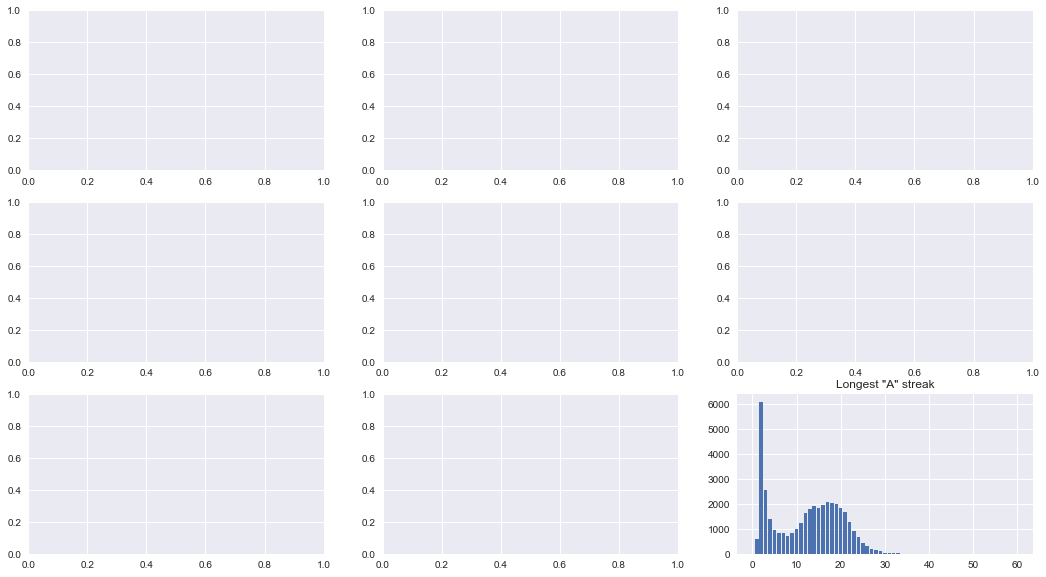

In [203]:
histo(longest_a_histo, 'Longest "A" streak')

# Total 'A' count in a read

In [204]:
result = []
counter_A = 0
for s in dna_reads:
    for base in s:
        if base == 'A':
            counter_A += 1
    result.append(counter_A)
    counter_A = 0

In [205]:
total_a = [0 for i in range(61)]
for r in result:
    total_a[r] += 1

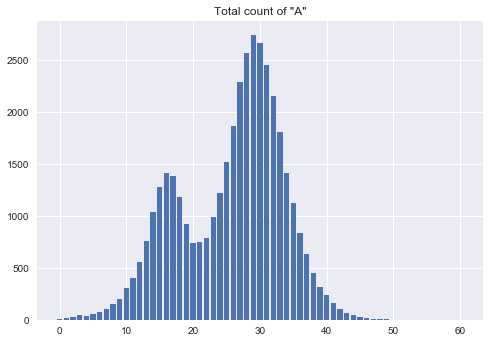

In [206]:
histo(total_a, plot_title='Total count of "A"')

# Count DNA reads by pool 

In [207]:
d = {
'ACAG': 0,
'AGTC': 0,
'ATCA': 0,
'CATG': 0,
'CTAC': 0,
'TCTA': 0,
'TGAT': 0,
'TTGG': 0,
'unknown': 0
}

# # or we can create this dict ourselves
# pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']
# {pool: 0 for pool in pools}

{'ACAG': 0,
 'AGTC': 0,
 'ATCA': 0,
 'CATG': 0,
 'CTAC': 0,
 'TCTA': 0,
 'TGAT': 0,
 'TTGG': 0,
 'unknown': 0}

In [208]:
for read in dna_reads:
    pool = read[3:7]
    if pool in d.keys():
        d[pool] += 1
    else:
        d['unknown'] += 1

In [209]:
print(d)

{'ACAG': 6374, 'AGTC': 7039, 'ATCA': 5960, 'CATG': 6634, 'CTAC': 7194, 'TCTA': 1, 'TGAT': 0, 'TTGG': 5564, 'unknown': 1234}


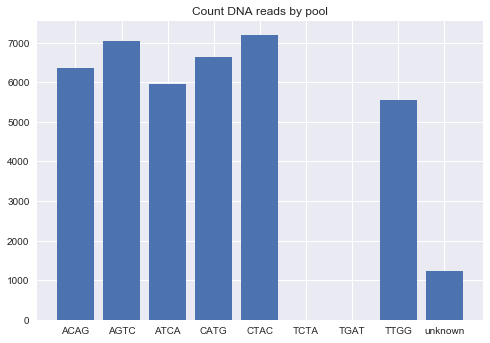

In [210]:
# order in a dict is not guaranteed, so we may get weird results
plt.bar(range(len(d.keys())),d.values())
plt.xticks(range(len(d)), list(sorted(d.keys())))
plt.title('Count DNA reads by pool')
plt.show()

# Count longest streak of 'A' by the pool

In [211]:
pools = ['ACAG', 'AGTC', 'ATCA', 'CATG', 'CTAC', 'TCTA', 'TGAT', 'TTGG', 'unknown']

# create a dictionary with keys as strings from pools and for values empty list with 61 zeroes
d = {k: list(0 for i in range(61)) for k in pools}

In [212]:
for read in dna_reads:
    pool = read[3:7]
    longest_a_streak_in_pool = longest_a_streak(read)
    lst_61_zeroes = d[pool] if pool in d.keys() else d['unknown']
    lst_61_zeroes[longest_a_streak_in_pool] += 1

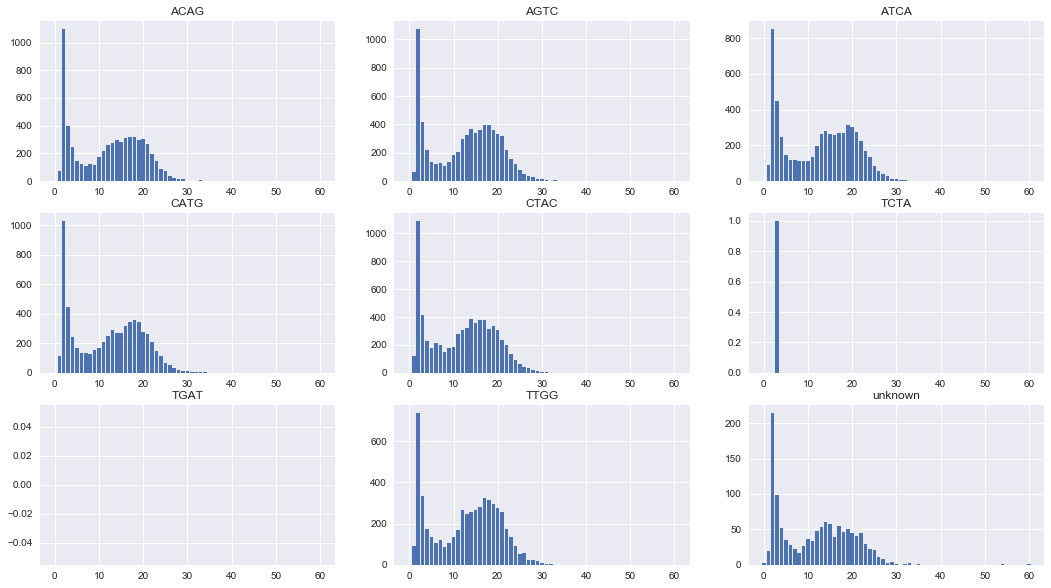

In [213]:
from itertools import product
graph_position = list(product(range(3), range(3)))

dim = {'x': 3, 'y': 3}
f, axarr = plt.subplots(dim['x'], dim['y'], figsize=(18, 10))

for coordinates, d_pool in zip(graph_position, d.items()):
    i, j = coordinates
    k, v = d_pool
    axarr[i, j].bar(range(len(v)),v)
    axarr[i, j].set_title(k)

plt.show()

# Poly-A tail analysis

In [214]:
def after_polyatail(read, next_n_bases=5, min_len_poly_a=8):
    """
    if a poly A tail length is grater than min_len_poly_a
    go to the end of the tail
    and return next n bases
    """
    counter_a = 0
    bases_after_poly_a = str()
    for index, base in enumerate(read):
        if base == 'A':
            counter_a += 1
        else:
            if counter_a > min_len_poly_a:
                bases_after_poly_a = read[index:index + next_n_bases]
            counter_a = 0
    return bases_after_poly_a

In [215]:
assert after_polyatail("AAAAAAAAAAAAAAAAAAAAAATCCCCCCCCCCCC") == 'TCCCC'
assert after_polyatail("ACACAT") == ''

In [216]:
from collections import Counter

for i in range(1,11):
    after_a = list()
    for read in dna_reads:
        s = after_polyatail(read, i)
        if s != '': # read didn't have min polyA tail -> returns ''
            after_a.append(s)
    print(Counter(after_a).most_common(6))


[('C', 12249), ('G', 6693), ('T', 6022), ('N', 18)]
[('CC', 4980), ('CA', 3388), ('TC', 2116), ('CG', 2002), ('GC', 1976), ('GG', 1912)]
[('CCC', 2390), ('CAA', 1332), ('CCA', 1099), ('CAC', 1046), ('GAA', 955), ('GGG', 848)]
[('CCCC', 1257), ('CAAA', 645), ('GAAA', 605), ('CCCA', 452), ('GGGG', 442), ('CCAA', 415)]
[('CCCCC', 680), ('GAAAA', 388), ('CAAAA', 346), ('GGGGG', 241), ('CCCCA', 213), ('CCAAA', 197)]
[('CCCCCC', 330), ('GAAAAA', 244), ('CAAAAA', 190), ('GGGGGG', 121), ('CCCCCA', 119), ('CCCCCT', 117)]
[('GAAAAAA', 153), ('CCCCCCC', 148), ('CAAAAAA', 115), ('GGGGGGG', 68), ('CCCCCCT', 62), ('CCCCCCG', 59)]
[('GAAAAAAA', 82), ('CCCCCCCC', 67), ('CAAAAAAA', 64), ('C', 50), ('T', 35), ('GGGGGGGG', 34)]
[('C', 50), ('GAAAAAAAA', 38), ('T', 35), ('G', 28), ('GAAAAGAAA', 26), ('CAAAAAAAA', 24)]
[('C', 50), ('T', 35), ('G', 28), ('CC', 20), ('GAAAAGAAAA', 20), ('TC', 17)]


# Consensus matrix on strings after poly A tail

In [217]:
# create a matrix with 5 rows and 10 columns, where every element is 0
matrix = [[0 for i in range(10)] for i in range(5)]
matrix

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [218]:
after_a = list()
for read in dna_reads:
    s = after_polyatail(read, 10)
    if s != '': # read didn't have min polyA tail -> returns ''
        after_a.append(s)

In [219]:
for s in after_a:
    for index, base in enumerate(s):
        if base == 'A':
            matrix[0][index] += 1
        elif base == 'C':
            matrix[1][index] += 1
        elif base == 'T':
            matrix[2][index] += 1
        elif base == 'G':
            matrix[3][index] += 1
        elif base == 'N':
            matrix[4][index] += 1
        else:
            print("Unexpected letter")

In [220]:
import pandas
df = pandas.DataFrame(matrix)
df.rename({0: 'A', 1: 'C', 2: 'T', 3: 'G', 4: 'N'})

# # as an alternative we can generate dict for .rename() ourselves
# alphabet = 'ACTGN'
# {k: v for k, v in zip(range(len(alphabet)), alphabet)}

{0: 'A', 1: 'C', 2: 'T', 3: 'G', 4: 'N'}

# Find consensus sequence (= artefact) after Poly A tail

In [221]:
rotated_after_a = [''.join(s) for s in zip(*after_a)] 
# e.g reads = ['AATC','ACTGA','ATG'] -> reads = ['AAA', ACT', 'TTG', 'CG', 'A' ]

In [222]:
# zip functions can be applied only to the lists of strings of the same lengh.
# If the string is shorter than the string with max length -> add space to the string
max_length = (len(max(after_a, key=len)))


for index, s in enumerate(after_a):
    if len(s) != max_length:  # if len of current string is not the same as maximum length
             after_a[index] = s + ' ' * ( max_length - len(s) ) 

after_a_rotated = ([''.join(s) for s in zip(*after_a)])

In [223]:
# count the number of each nucleotide in each column
a_list = []
t_list = []
g_list = []
c_list = []
n_list = []


for read in after_a_rotated:
    a_list.append( read.count( 'A' ))
    t_list.append( read.count( 'T' ))
    g_list.append( read.count( 'G' ))
    c_list.append( read.count( 'C' ))
    n_list.append( read.count( 'N' ))

In [224]:
# define an artefact based on consensus

data = list((zip(a_list, t_list, g_list, c_list, n_list)))
#1st tuple 1st column from the reads

d = {0:'A', 1:'T', 2:'G', 3:'C', 4:'N'}
artefact = str()
for line in data:
    max_value = max( line ) # find max value in current line
    index_of_max_value = line.index( max_value )  # find index of max value in current line
    artefact += d[index_of_max_value]
print( artefact )
    
    

CCCCCCGGGA


# Misc

In [225]:
# ls directory
# !ls /Users/dariapodorskaja/Desktop/Lab/

In [226]:
# find string which are at least 10 A, then anything but A, then at least another 10 A
# motif = !cat /Users/dariapodorskaja/Desktop/Lab/Lane_7_NoIndex_L007_R1_001.fastq | grep '[A]\{10,\}[^A][A]\{10,\}'
# motif = list(motif) # by default it creates SList, we want to convert it to standard list